# Statistics review 3: Hypothesis testing and P values

R code accompanying [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC137449/pdf/cc1493.pdf)

## Key learning points

- A P value is the probability that an observed effect is simply due to chance; it therefore provides a measure of the strength of an association.
- P values are affected both by the magnitude of the effect and by the size of the study from which they are derived, and should therefore be interpreted with caution.
- Subdividing P values into *significant* and *non-significant* is poor statistical practice and should be avoided.

In [1]:
suppressPackageStartupMessages(library(tidyverse))

In [2]:
options(repr.plot.width=4, repr.plot.height=3)

In [3]:
plot_area <- function(lower, upper) {
    x <- seq(-3,3,length.out = 100)
    y <- dnorm(x, 0, 1)
    df <- data.frame(x=x, y=y)
    area <- round(100 * (1-pnorm(lower)), 2)
    ggplot(df, aes(x=x, y=y)) + geom_line() +
    stat_function(fun = dnorm, 
                  xlim = c(lower, upper),
                  geom = "area",
                  fill='salmon') +
    scale_x_continuous(breaks=c(lower, upper)) +
    annotate("text", label = paste(area, "%", " (p=", area/100, ")", sep=""), size=3, x = 3, y = 0.3) +
    xlab("") + ylab("") +
    theme(axis.text.y = element_blank(),
          axis.ticks.y = element_blank())
    }

In [4]:
plot_area_two_sided <- function(lower, upper) {
    x <- seq(-3,3,length.out = 100)
    y <- dnorm(x, 0, 1)
    df <- data.frame(x=x, y=y)
    area <- 2*round(100 * (1-pnorm(lower)), 2)
    ggplot(df, aes(x=x, y=y)) + geom_line() +
    stat_function(fun = dnorm, 
                  xlim = c(lower, upper),
                  geom = "area",
                  fill='salmon') +
    stat_function(fun = dnorm, 
                  xlim = c(-upper, -lower),
                  geom = "area",
                  fill='salmon') +       
    scale_x_continuous(breaks=c(lower, upper)) +
    annotate("text", label = paste(area, "%", " (p=", area/100, ")", sep=""), size=3, x = 3, y = 0.3) +
    xlab("") + ylab("") +
    theme(axis.text.y = element_blank(),
          axis.ticks.y = element_blank())
    }

## What is a p-value?

A p-value is the probability of getting a value as extreme or more extreme than some observed value would occur by chance if the null hypothesis is true. For example, if the null hypothesis is that the difference in means between two treatment groups is normally distributed with mean 0 and standard deviation 1, then the probability of observing a difference greater than 2 is the area shown in pink. 

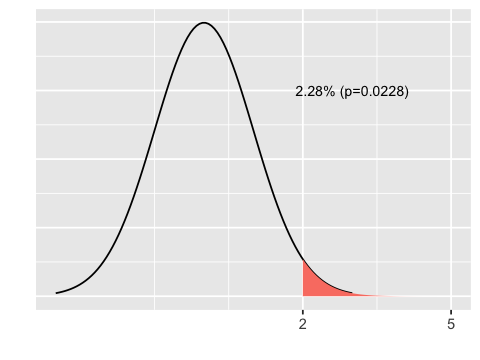

In [5]:
plot_area(2, 5)

### One and two sided tests

Often, we are agnostic as to which direction the differnce is, and so calcualte the p-value as the area on both extremes. Note that the p-value is larger for a two-sided test.

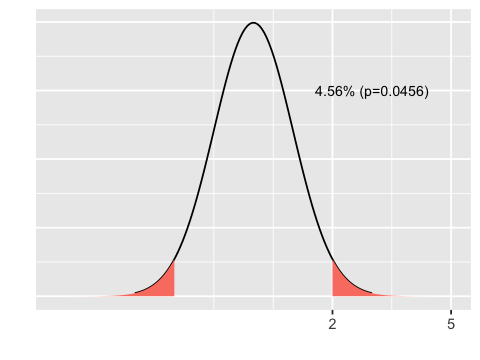

In [6]:
plot_area_two_sided(2, 5)

### What we need to calculate a p-value

- Null and alternative hypotheses
- Distribution of values if the null hypothesis is true

For some common comparison tests, the null distribution is known and the-value can be easily calculated. In other cases, we do not know what the null distribution is in *closed form* and must use computationally intensive methods to approximate it. 

## Effect of sample size

Suppose there is some small difference in a normally distributed variable between two groups. We use simulation to see how the p value varies with sample size.

### N=10

In [7]:
delta <- 0.2
n <- 10
x1 <- rnorm(n, 0, 1)
x2 <- rnorm(n, 0+delta, 1)
t.test(x1, x2)


	Welch Two Sample t-test

data:  x1 and x2
t = 0.17497, df = 17.374, p-value = 0.8631
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8340201  0.9851291
sample estimates:
 mean of x  mean of y 
0.16433555 0.08878103 


### N=100

In [8]:
delta <- 0.2
n <- 100
x1 <- rnorm(n, 0, 1)
x2 <- rnorm(n, 0+delta, 1)
t.test(x1, x2)


	Welch Two Sample t-test

data:  x1 and x2
t = -1.7555, df = 195.48, p-value = 0.08075
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.52871630  0.03073659
sample estimates:
  mean of x   mean of y 
-0.03132281  0.21766704 


### N=500

In [9]:
delta <- 0.2
n <- 500
x1 <- rnorm(n, 0, 1)
x2 <- rnorm(n, 0+delta, 1)
t.test(x1, x2)


	Welch Two Sample t-test

data:  x1 and x2
t = -2.6812, df = 996.95, p-value = 0.007456
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.28920279 -0.04477245
sample estimates:
 mean of x  mean of y 
0.01777934 0.18476696 


### Confidence intervals

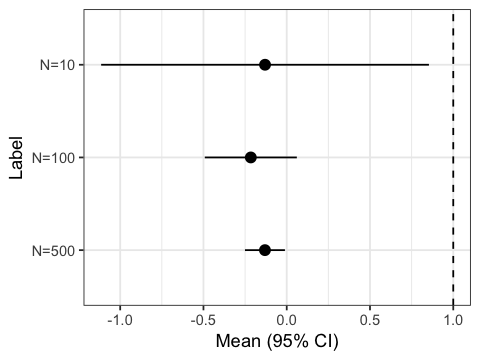

In [10]:
label <- paste0("N=", c(10, 100, 500))
mean  <- c(0.3454198-0.4756790 , 0.06476682-0.28044059 , 0.01410214-0.14486843 )
lower <- c( -1.1144221, -0.49197251, -0.25071807)
upper <- c(0.8539038, 0.06062498, -0.01081449)
df <- data.frame(label, mean, lower, upper)

# reverses the factor level ordering for labels after coord_flip()
df$label <- factor(df$label, levels=rev(df$label))

library(ggplot2)
fp <- ggplot(data=df, aes(x=label, y=mean, ymin=lower, ymax=upper)) +
        geom_pointrange() + 
        geom_hline(yintercept=1, lty=2) +  # add a dotted line at x=1 after flip
        coord_flip() +  # flip coordinates (puts labels on y axis)
        xlab("Label") + ylab("Mean (95% CI)") +
        theme_bw()  # use a white background
print(fp)

## Exercises

Suppose the null distribution is a normal distribution with mean 1 and standard deviation 2. You observe a value of 2.

**1**. Calculate the one-sided p-value

**2**. Calculate the two-sided p-value

**3**. Calculate the 95% confidence interval for the observed two-sided p-value

**4**. Make a plot just like the ones shown above for the two-sided test